In [1]:
import torch
import NURBS_PyTorch_2 as NP2
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Curve in 2D example

curve_2D(
	n_inputs = 1,
	n_outputs = 2,
	include_weights = False,
	control_net_shape = (10,),
	basis_functions (dim 0) = basis_functions(
		degree = 3,
		knot_vector = knot_vector(
			knots = tensor([0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000],
			       device='cuda:0'),
			multiplicities = tensor([4, 1, 1, 1, 1, 1, 1, 4], device='cuda:0', dtype=torch.int32),
			open = True,
			equispaced = True
		)
	)
)


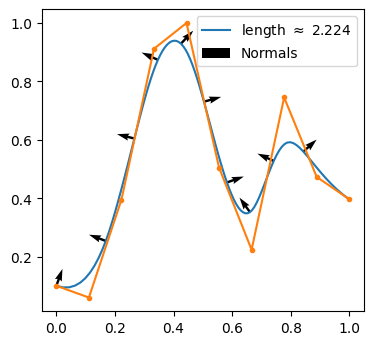

In [2]:
C_2D = NP2.Curve_2D()

kv   = NP2.basis_functions.Knot_vector.make_open()
bf   = NP2.basis_functions.Basis_functions(kv)

C_2D.set_parameters(
                  basis_function_sets      = [bf],
                  control_point_coord_sets = [torch.linspace(0,1,10),
                                              torch.rand(C_2D.control_net_shape)])

print(C_2D)

curve_2D = C_2D.eval_grid().squeeze().cpu()

fig_2D,ax_2D = plt.subplots(dpi = 100)

ax_2D.plot(curve_2D[:,0],
           curve_2D[:,1],
           label = f"length $\\approx$ {C_2D.get_length().item():.3f}")

ax_2D.plot(C_2D.control_point_coord_sets[0].cpu(),
            C_2D.control_point_coord_sets[1].cpu(), 
            marker = ".")

u       = torch.linspace(0,1, 100, device = C_2D.device)
normals = C_2D.normals(u[::10]).cpu()

ax_2D.quiver(curve_2D[::10,0],
              curve_2D[::10,1],
              normals[:,0],
              normals[:,1],
              label = "Normals")

ax_2D.legend()
ax_2D.set_aspect("equal")

## Curve in 3D example

curve_3D(
	n_inputs = 1,
	n_outputs = 3,
	include_weights = False,
	control_net_shape = (20,),
	basis_functions (dim 0) = basis_functions(
		degree = 3,
		knot_vector = knot_vector(
			knots = tensor([0.0000, 0.0588, 0.1176, 0.1765, 0.2353, 0.2941, 0.3529, 0.4118, 0.4706,
			        0.5294, 0.5882, 0.6471, 0.7059, 0.7647, 0.8235, 0.8824, 0.9412, 1.0000],
			       device='cuda:0'),
			multiplicities = tensor([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4], device='cuda:0',
			       dtype=torch.int32),
			open = True,
			equispaced = True
		)
	)
)


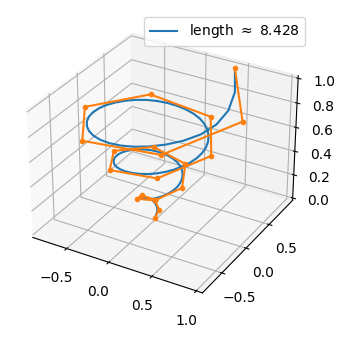

In [3]:
n_control_points = 20

kv   = NP2.basis_functions.Knot_vector.make_open(n_control_points = n_control_points)
bf   = NP2.basis_functions.Basis_functions(kv)

control_points_z = torch.linspace(0,1,n_control_points)
control_points_x = control_points_z*torch.cos(20*control_points_z)
control_points_y = control_points_z*torch.sin(20*control_points_z)

C_3D = NP2.Curve_3D(n_control_points = n_control_points)
C_3D.set_parameters(
                  basis_function_sets      = [bf],
                  control_point_coord_sets = [control_points_x,
                                              control_points_y,
                                              control_points_z])

print(C_3D)

fig_3D = plt.figure(dpi = 100)
ax_3D  = fig_3D.add_subplot(projection = "3d")

curve_3D = C_3D.eval_grid().squeeze().cpu().numpy()

ax_3D.plot(curve_3D[:,0],
            curve_3D[:,1],
            curve_3D[:,2],
            label = f"length $\\approx$ {C_3D.get_length().item():.3f}")

ax_3D.plot(C_3D.control_point_coord_sets[0].cpu().numpy(),
            C_3D.control_point_coord_sets[1].cpu().numpy(),
            C_3D.control_point_coord_sets[2].cpu().numpy(),
            marker = ".")

ax_3D.legend();

## Surface in 3D example

surface_3D(
	n_inputs = 2,
	n_outputs = 3,
	include_weights = False,
	control_net_shape = (15, 25),
	basis_functions (dim 0) = basis_functions(
		degree = 4,
		knot_vector = knot_vector(
			knots = tensor([0.0000, 0.0909, 0.1818, 0.2727, 0.3636, 0.4545, 0.5455, 0.6364, 0.7273,
			        0.8182, 0.9091, 1.0000], device='cuda:0'),
			multiplicities = tensor([5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5], device='cuda:0',
			       dtype=torch.int32),
			open = True,
			equispaced = True
		)
	),
	basis_functions (dim 1) = basis_functions(
		degree = 6,
		knot_vector = knot_vector(
			knots = tensor([0.0000, 0.0526, 0.1053, 0.1579, 0.2105, 0.2632, 0.3158, 0.3684, 0.4211,
			        0.4737, 0.5263, 0.5789, 0.6316, 0.6842, 0.7368, 0.7895, 0.8421, 0.8947,
			        0.9474, 1.0000], device='cuda:0'),
			multiplicities = tensor([7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7],
			       device='cuda:0', dtype=torch.int32),
			open = True,
			equispaced = True
		)
	)
)


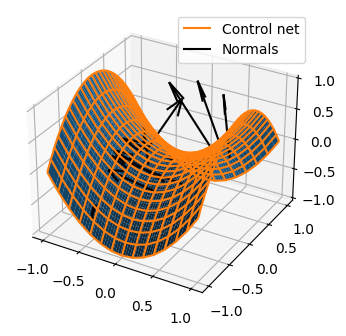

In [4]:
n_control_points_1 = 15
n_control_points_2 = 25

degree_1 = 4
degree_2 = 6

kv_1 = NP2.basis_functions.Knot_vector.make_open(n_control_points = n_control_points_1,
                                             degree           = degree_1)
bf_1 = NP2.basis_functions.Basis_functions(kv_1)

kv_2 = NP2.basis_functions.Knot_vector.make_open(n_control_points = n_control_points_2,
                                             degree           = degree_2)
bf_2 = NP2.basis_functions.Basis_functions(kv_2)

S_3D = NP2.Surface_3D(control_net_shape = (n_control_points_1,
                                       n_control_points_2))

control_points_x = torch.linspace(-1,1, n_control_points_1)
control_points_y = torch.linspace(-1,1, n_control_points_2)

control_points_x, control_points_y = torch.meshgrid(control_points_x,
                                                    control_points_y,
                                                    indexing = 'ij')

control_points_z = control_points_x**2 -control_points_y**2

S_3D.set_parameters(basis_function_sets      = [bf_1,bf_2],
                    control_point_coord_sets = [control_points_x,
                                                control_points_y,
                                                control_points_z])

print(S_3D)

surface_3D = S_3D.eval_grid().squeeze().cpu()

fig_3D = plt.figure(dpi = 100)
ax_3D  = fig_3D.add_subplot(projection = "3d")

ax_3D.plot_surface(surface_3D[:,:,0],
                   surface_3D[:,:,1],
                   surface_3D[:,:,2])

ax_3D.plot_wireframe(control_points_x.numpy(),
                     control_points_y.numpy(),
                     control_points_z.numpy(),
                     color = "C1", label = "Control net")

N = 10
u = torch.rand(N).to(S_3D.device)
v = torch.rand(N).to(S_3D.device)

locs, normals = S_3D.normals(u,v, return_locs = True)

locs    = locs.cpu()
normals = normals.cpu()

ax_3D.quiver(locs[:,0],
             locs[:,1],
             locs[:,2],
             normals[:,0],
             normals[:,1],
             normals[:,2],
             color = 'k',
             label = "Normals")

ax_3D.legend();

### Triangle mesh generation

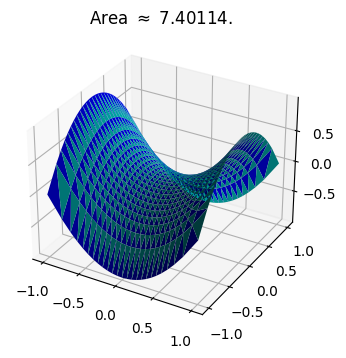

In [5]:
import matplotlib.tri as mtri

vertices, faces, area = S_3D.area(25, return_mesh = True)

n_faces      = faces.shape[0]
vertices_cpu = vertices.cpu().numpy()
faces_cpu    = faces.cpu().numpy()
triang1      = mtri.Triangulation(vertices_cpu[:,0],
                                  vertices_cpu[:,1],
                                  triangles=faces_cpu[:n_faces//2]) 
triang2      = mtri.Triangulation(vertices_cpu[:,0],
                                  vertices_cpu[:,1],
                                  triangles=faces_cpu[n_faces//2:]) 

fig = plt.figure(dpi = 100)
ax  = fig.add_subplot(projection = '3d')
ax.plot_trisurf(triang1,
                vertices_cpu[:,2], color = 'b', zorder = 0)
ax.plot_trisurf(triang2,
                vertices_cpu[:,2], color = 'c', zorder = 0)

ax.set_title(f"Area $\\approx$ {area.item():1.5f}.");

## Curve with weights in 2D example

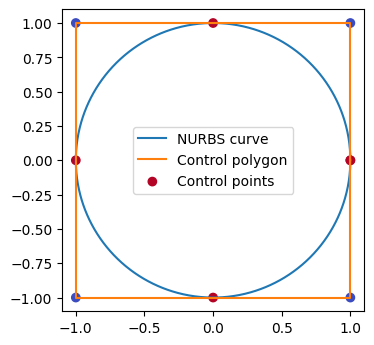

In [6]:
Circ  = NP2.Curve_2D(n_control_points = 9, include_weights = True)
knots = torch.tensor([0,1/4,1/2,3/4,1], device = Circ.device)
mult  = torch.tensor([3,2,2,2,3], device = Circ.device)
kv    = NP2.Knot_vector(knots, multiplicities = mult, degree = 2)

weights       = torch.ones(9, device = Circ.device)
weights[1::2] = torch.sqrt(torch.tensor(2., device = Circ.device))/2

control_points = torch.tensor([[1,0],
                              [1,1],
                              [0,1],
                             [-1,1],
                             [-1,0],
                            [-1,-1],
                             [0,-1],
                             [1,-1],
                             [1,0]], device = Circ.device)

Circ.set_parameters(basis_function_sets      = [NP2.Basis_functions(kv)],
                    weights                  = weights,
                    control_point_coord_sets = [control_points[:,0],
                                                control_points[:,1]])

N     = 1000
curve = Circ.eval_grid(N).squeeze().cpu()

fig,ax = plt.subplots(dpi = 100)

ax.plot(curve[:,0],curve[:,1], label = "NURBS curve")
ax.set_aspect('equal')

ax.plot(Circ.control_point_coord_sets[0].cpu(),
        Circ.control_point_coord_sets[1].cpu(), label = "Control polygon")

ax.scatter(Circ.control_point_coord_sets[0].cpu(),
           Circ.control_point_coord_sets[1].cpu(),
           c = Circ.weights.cpu(), cmap = 'coolwarm',
           label = "Control points")

ax.legend();